In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

df = pd.read_csv('Kolkata.csv')

def reducer(val):
    return 0 if val == 0 else 1 

excludeThis = ["Area" , "Price" , "No. of Bedrooms" , "Location"]
for key in df.keys():
    if key not in excludeThis : 
        df[key] = df[key].apply(reducer)


print("\nFeatures after keeping needed features\n")
picked_keys = df.keys()
print(picked_keys)


print("\nFirst 5 rows of New data frame after keeping needed features \n")
print(df.head(6))




Features after keeping needed features

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

First 5 rows of New data frame after keeping needed features 

     Price       Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  2235000       1016      Barasat              3.0       0                 0   
1  3665999  1000-1111    Keshtopur              2.0       0                 1   
2  3

In [2]:
def format_area(area):
    parameter_type = type(area)
    if parameter_type == type(1.0) or parameter_type == type(1) : return area
    
    token = area.split("-")
    if len(token) == 1 :
        return area 
    else:
        return (float(token[0]) + float(token[1])) / 2

    
df["Area"] = df["Area"].apply(format_area)
df["Area"] = df["Area"].apply(lambda x : float(x))

df = df.dropna()


df["pps"] = df['Price'] / df["Area"]
print(df.head())
df.shape



     Price    Area   Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  2235000  1016.0    Barasat              3.0       0                 0   
1  3665999  1055.5  Keshtopur              2.0       0                 1   
2  3774000  1020.0   Rajarhat              2.0       0                 0   
4  8300000  1956.0   New Town              3.0       1                 0   
6  9727000  1107.0     Tangra              3.0       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  BED  \
0          1             1                  1             1  ...    0   
1          1             0                  1             1  ...    0   
2          1             0                  0             0  ...    0   
4          1             1                  1             1  ...    0   
6          1             1                  1             1  ...    0   

   VaastuCompliant  Microwave  GolfCourse  TV  DiningTable  Sofa  Wardrobe  \
0                0        

(6505, 41)

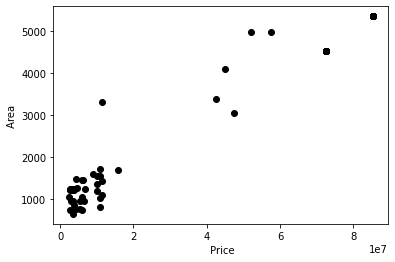

In [3]:

def remv_pps_outliers2_stdDev(df):
    new_df = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.pps)
        st = np.std(subdf.pps)
        reduced_df = subdf[(subdf.pps>(m-st)) & (subdf.pps<=(m+st))]
        new_df = pd.concat([new_df,reduced_df],ignore_index=True)
    return new_df


def remv_pps_outliers_logic(df):
    df_res = pd.DataFrame()
    new_df = df[(df.pps >= 2000) & (df.pps <= 20000)]
    df_res = pd.concat([df_res , new_df] , ignore_index = True)

    return df_res


df2 = remv_pps_outliers_logic(df)
df4 = remv_pps_outliers2_stdDev(df2)

plt.xlabel(" Price")
plt.ylabel(" Area ")
plt.scatter(df4["Price"][:100] , df4["Area"][:100] , color='black' ,  marker ='o')


In [4]:
df4.pps.describe()

count     4255.000000
mean      4817.351230
std       2224.287941
min       2000.000000
25%       3270.904032
50%       4335.398230
75%       5782.683313
max      19500.000000
Name: pps, dtype: float64

In [5]:

location_counts = df4.groupby('Location')['Location'].agg('count')
print(location_counts)


print("Entries with <= threshold data points ",sum(location_counts[location_counts <= 5]))
rename_as_others = location_counts[location_counts  <= 5]
df4.Location = df4.Location.apply(lambda x : "others" if x in rename_as_others else x)

print("New number of unique Locations After grouping : ",len(df4.Location.unique()))


Location
Action Area I             1
Action Area I Newtown     4
Action Area II Newtown    1
Action Area III           2
Airport                   6
                         ..
purbalok                  1
raghunathpur              1
salt lake sec iii         1
shalimar                  3
south dum dum             8
Name: Location, Length: 206, dtype: int64
Entries with <= threshold data points  251
New number of unique Locations After grouping :  91


In [6]:
dummy_locations = pd.get_dummies(df4.Location)

df_temp = df4.drop(labels = ["Location" , "pps"] , axis = 'columns')
final_df = pd.concat([dummy_locations , df_temp] , axis = "columns")

print(final_df.head(3))

x = final_df.drop(labels = "Price" , axis = 'columns')
y = final_df["Price"]

# y = c + m1x1 + m2x2 .... 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)


model = LinearRegression()
model.fit(x_train , y_train)

y_predicted = model.predict(x_test) 


sc = model.score(x_test , y_test) 


print("Accuracy Score ", sc , " percentage " , sc*100 , "% ")





   Airport  Alipore  Anandapur  Ashok Nagar  Baguiati  Ballygunge  Bangur  \
0        0        0          0            0         0           0       0   
1        0        0          0            0         0           0       0   
2        0        0          0            0         0           0       0   

   Bansdroni  Baranagar  Barasat  ...  LiftAvailable  BED  VaastuCompliant  \
0          0          0        0  ...              1    1                1   
1          0          0        0  ...              1    1                1   
2          0          0        0  ...              1    1                1   

   Microwave  GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  
0          1           1   1            1     1         1             1  
1          1           1   1            1     1         1             1  
2          1           1   1            1     1         1             1  

[3 rows x 130 columns]
Accuracy Score  0.9229556642833269  percentage  92.2955664

In [7]:
print("total Entries ",len(final_df))
print(x_train.keys())


total Entries  4255
Index(['Airport', 'Alipore', 'Anandapur', 'Ashok Nagar', 'Baguiati',
       'Ballygunge', 'Bangur', 'Bansdroni', 'Baranagar', 'Barasat',
       ...
       'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse',
       'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object', length=129)


In [8]:

def predict(d):
    x = [0]*len(x_train.columns)
 
    for key in d.keys():
        if key == "Price" or key == 'pps': continue 
            
        index = x_train.columns.get_loc(key if key != "Location" else d[key])
        if key == "Location" : 
            x[index] = 1  
        else :
            x[index] = d[key]
    
    return model.predict([x])[0]
 
    
    

record = final_df[998:999]


print(record , " Actual price " , record["Price"].values[0] / 100000 , " lakhs ")


d = {}
for col in record:
    val =  record[col].values[0]
    d[col] = val 
    

ans = predict(d) 
print("Estimated price  " , ans / 100000 , " lakhs ")




     Airport  Alipore  Anandapur  Ashok Nagar  Baguiati  Ballygunge  Bangur  \
998        0        0          0            0         0           0       0   

     Bansdroni  Baranagar  Barasat  ...  LiftAvailable  BED  VaastuCompliant  \
998          0          0        0  ...              1    1                1   

     Microwave  GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  
998          1           1   1            1     1         1             1  

[1 rows x 130 columns]  Actual price  70.3  lakhs 
Estimated price   72.68373569210563  lakhs 
